In [4]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.tasks import *

from django.db.models import Count, Sum

p = Project.objects.get(pk=147)
qid = 6299


In [5]:
# Define some snappy names that will fit on the plots
# TODO: Someone should choose these carefully
short_name_dict = {
    "Sufficiency and distributional analyses in the demand side of climate change mitigation":"Sufficiency",
    "Determinants of low-carbon transport mode adoption: Systematic review of reviews": "Transport",
    "Status consciousness in energy consumption decisions: A systematic review of literature": "Status",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions-II": "SDG Diets II",
    "Well-being/demand side search query": "Well-being",
    "Well-being, demand side search query": "Well-being",
    "Systematic Review of Case Studies on Demand Side Climate Mitigation Actions through Local Urban Governance in Developing Countries":"Urban Governance",
    "Shared Mobility: A Systematic Review of its Impacts": "Shared Mobility",
    "Working time reduction in climate change mitigation (same paper, diff query)":"Working Time",
    "Working time reduction in climate change mitigation": "Working Time II",
    "Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development": "Indigenous Knowledge",
    "Dematerialisation and sharing of goods: a systematic review of the determinants and magnitude of the indirect impacts on energy consumption":"Dematerialising & Sharing",
    "Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions": "Food Behaviour",
    "Disruptive consumer innovations for climate change": "Disruptive Innovations",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions": "SDG Diets",
    "A literature survey on demand-side solutions for climate-change mitigation": "Literature Survey",
    "A literature survey on demand-side solutions for climate-change mitigation (2)": "Literature Survey (2)",
    "Urban energy demand in global south cities": "Global South Cities",
    "A Systematic Review for The Equity of Health Burdens Caused by Climate Change": "Health Equity",
    "Drivers for Behavioural Change": "Behavioural Drivers",
    "The potential for teleworking": "Teleworking",
    "Acceptability for climate solution": "Acceptability",
    "Quantifying the potential for climate change mitigation of consumption-based options": "Quantifying potential",
    "A global map of demand typologies for a low-carbon building sec": "Building Demand Typologies",
    "Bottom-up drivers of household energy behavior changes": "Bottom-up drivers",
    "Bottom-up drivers of household energy behavior changes (2)": "Bottom-up drivers (2)",
}

In [20]:
qs = Query.objects.filter(
    project=p,
    pk__gt=6304,
    creator__username="java",
).exclude(
    pk__in=[6262,6265,6256,6263,6260,6303,6299,6270],
    text__contains="GENERATED"
).order_by('r_count')


qdicts = []
for q in qs:
    for q2 in qs:
        if q==q2:
            continue
        d1 = set(q.doc_set.all().values_list('pk', flat=True))
        d2 = set(q2.doc_set.all().values_list('pk', flat=True))
        docs = d1 & d2
        qd = {
            'q1': short_name_dict[q.title],
            'q2': short_name_dict[q2.title],
            'q1_total': len(d1),
            'q2_total': len(d2),
            'ndocs': len(docs)
        }
        qdicts.append(qd)
        
ldf = pd.DataFrame.from_dict(qdicts)

ldf.head()   

,ndocs,q1,q1_total,q2,q2_total
0,1,Shared Mobility,125,Urban Governance,246
1,0,Shared Mobility,125,Well-being,545
2,1,Shared Mobility,125,Bottom-up drivers (2),577
3,0,Shared Mobility,125,Acceptability,635
4,1,Shared Mobility,125,Food Behaviour,1045


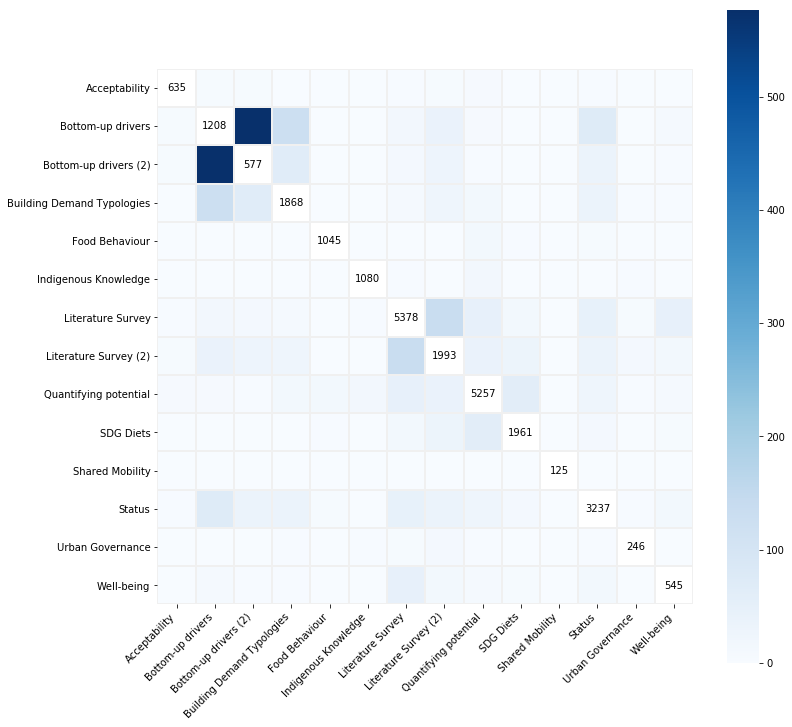

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

df = ldf.pivot(index="q1",columns="q2",values="ndocs")
import seaborn as sns
ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45,ha="right") 
for i, (name,qt) in enumerate(ldf.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center")

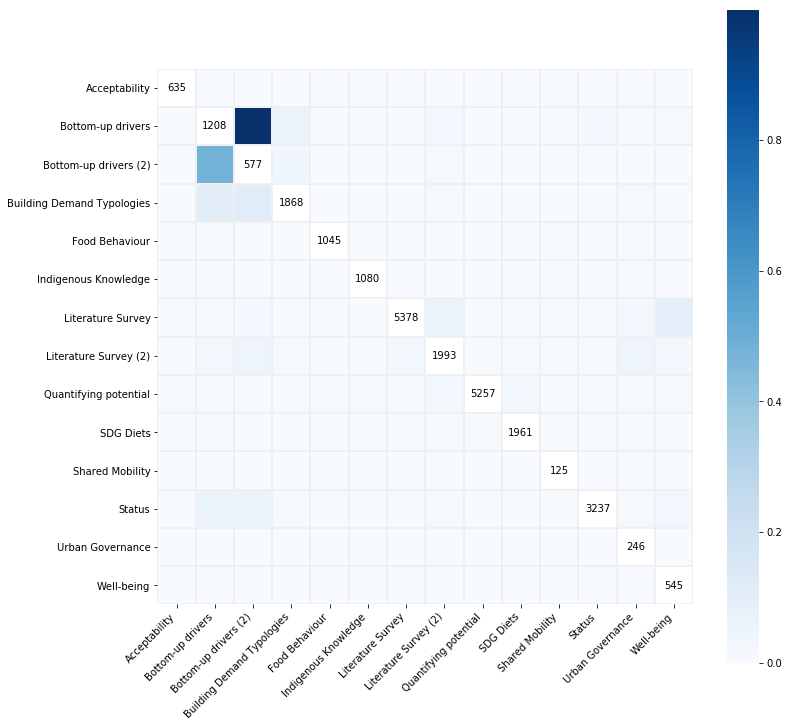

In [22]:
# Now we show column shares
fig, ax = plt.subplots(figsize=(12,12))
ldf['q_share'] = ldf['ndocs'] / ldf['q2_total']
df = ldf.pivot(index="q1",columns="q2",values="q_share")


ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xticks(rotation=45,ha="right") 
plt.xlabel("")
plt.ylabel("")
for i, (name,qt) in enumerate(ldf.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center")
    


In [24]:
p2 = Project.objects.get(pk=148)
all_qs = list(qs) + list(p2.query_set.filter(
    database="WoS",title__iregex="^Query [A-Z]_renew"
).order_by('title'))
qdicts = []

for q in all_qs:
    if "renew" in q.title:
        t1 = q.title.replace('query ','').replace('Query ','')[:1].lower()+"."
    else:
        try:
            t1 = short_name_dict[q.title]
        except:
            t1 = q.title[:2]
    for q2 in all_qs:
        if q==q2:
            continue
        d1 = set(q.doc_set.all().values_list('pk', flat=True))
        d2 = set(q2.doc_set.all().values_list('pk', flat=True))
        docs = d1 & d2
        if "renew" in q2.title:
            t2 = q2.title.replace('query ','').replace('Query ','')[:1].lower()+"."
        else:
            try:
                t2 = short_name_dict[q2.title]
            except:
                t2 = q2.title.replace('query ','').replace('Query ','')[:1]
        qd = {
            'q1': t1,
            'q2': t2,
            'q1_total': len(d1),
            'q2_total': len(d2),
            'ndocs': len(docs)
        }
        qdicts.append(qd)
        
ldf_all = pd.DataFrame.from_dict(qdicts)

ldf_all.head()   

,ndocs,q1,q1_total,q2,q2_total
0,1,Shared Mobility,125,Urban Governance,246
1,0,Shared Mobility,125,Well-being,545
2,1,Shared Mobility,125,Bottom-up drivers (2),577
3,0,Shared Mobility,125,Acceptability,635
4,1,Shared Mobility,125,Food Behaviour,1045


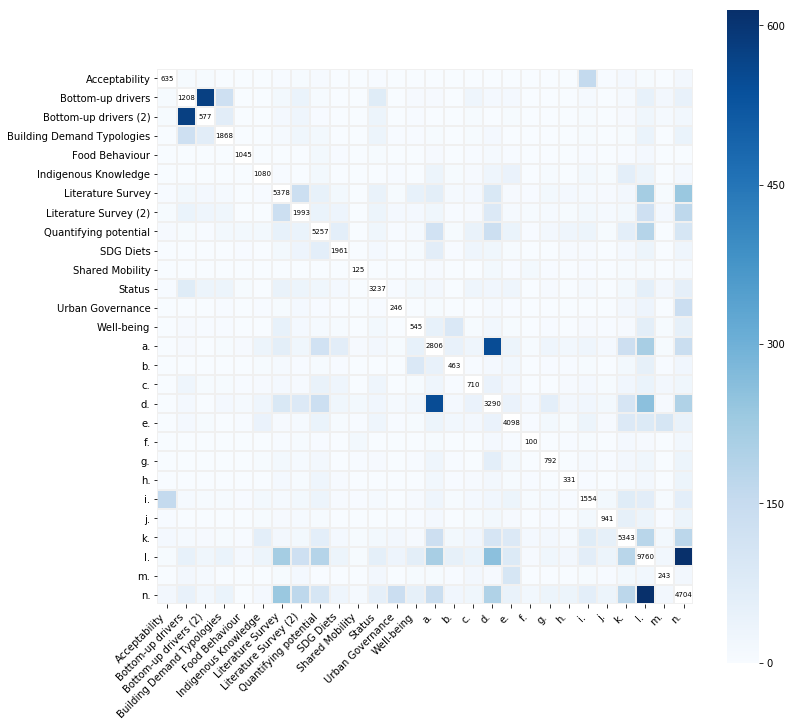

In [25]:
fig, ax = plt.subplots(figsize=(12,12))

df = ldf_all.pivot(index="q1",columns="q2",values="ndocs")
import seaborn as sns
ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45,ha="right") 
for i, (name,qt) in enumerate(ldf_all.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center",fontsize=7)
    
fname = "plots/bibliometrics/overlap_all_ndocs"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

## Column shares
Here each square shows the share of the column total

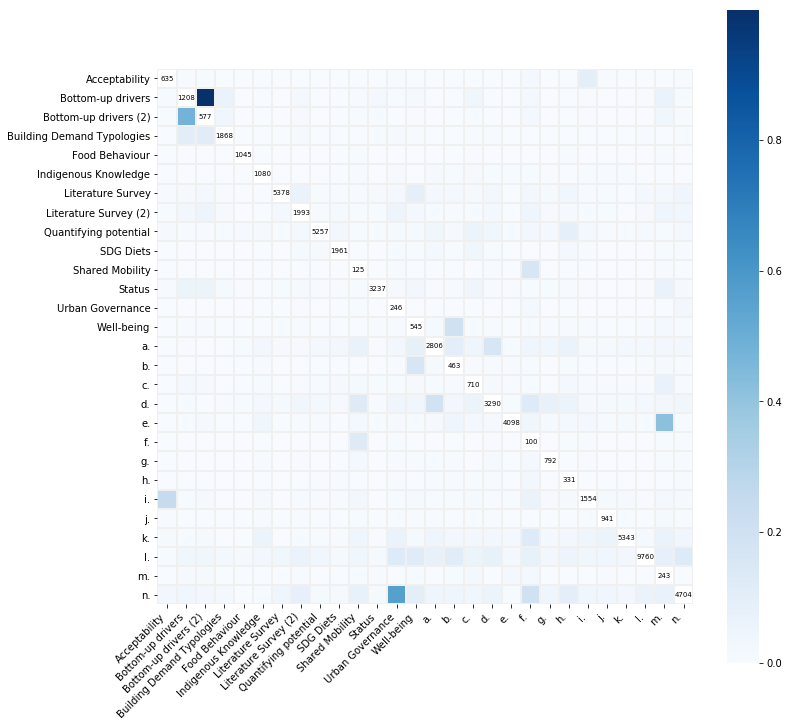

In [26]:
# Now we show column shares
fig, ax = plt.subplots(figsize=(12,12))
ldf_all['q_share'] = ldf_all['ndocs'] / ldf_all['q2_total']
df = ldf_all.pivot(index="q1",columns="q2",values="q_share")


ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xticks(rotation=45,ha="right") 
plt.xlabel("")
plt.ylabel("")
for i, (name,qt) in enumerate(ldf_all.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center",fontsize=7)
    
fname = "plots/bibliometrics/overlap_all_rowshares"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

In [47]:
p3 = Project.objects.get(pk=210)
p3qs = p3.query_set.filter(creator__username="java")
print(p3qs.order_by('title'))

qdicts = []

for q in p3qs:
    if "renew" in q.title:
        t1 = q.title.replace('query ','').replace('Query ','')[:1].lower()+"."
    elif "x" in q2.title:
        t1 = q.title
    else:
        try:
            t1 = short_name_dict[q.title]
        except:
            t1 = q.title[:2]
    for q2 in p3qs:
        if q==q2:
            continue
        d1 = set(q.doc_set.all().values_list('pk', flat=True))
        d2 = set(q2.doc_set.all().values_list('pk', flat=True))
        docs = d1 & d2
        if "renew" in q2.title:
            t2 = q2.title.replace('query ','').replace('Query ','')[:2].lower()+"."
        elif "x" in q2.title:
            t2 = q2.title
        else:
            try:
                t2 = short_name_dict[q2.title]
            except:
                t2 = q2.title.replace('query ','').replace('Query ','')[:1]
        qd = {
            'q1': t1,
            'q2': t2,
            'q1_total': len(d1),
            'q2_total': len(d2),
            'ndocs': len(docs)
        }
        qdicts.append(qd)
        
ldf_all = pd.DataFrame.from_dict(qdicts)

ldf_all.head()   

<QuerySet [<Query: x1>, <Query: x11>, <Query: x12>, <Query: x13>, <Query: x2>, <Query: x3>, <Query: x4>, <Query: x5>, <Query: x6>, <Query: x7>, <Query: x8>, <Query: x9>]>


,ndocs,q1,q1_total,q2,q2_total
0,21,x5,5356,x6,174
1,42,x5,5356,x8,607
2,835,x5,5356,x2,4079
3,444,x5,5356,x3,6091
4,133,x5,5356,x7,804


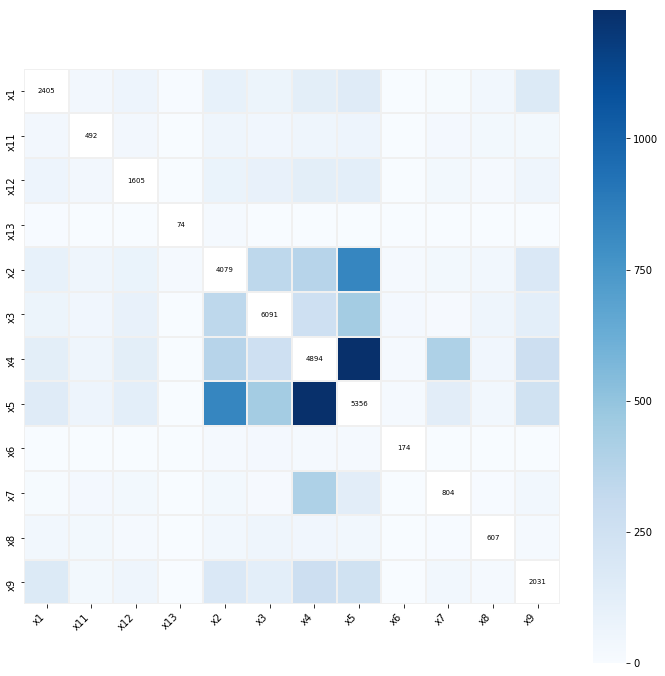

In [49]:
fig, ax = plt.subplots(figsize=(12,12))

df = ldf_all.pivot(index="q1",columns="q2",values="ndocs")
import seaborn as sns
ax = sns.heatmap(
    df,
    cmap="Blues",
    square=True,
    linecolor="#F0F0F0",
    linewidths=1
)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45,ha="right") 
for i, (name,qt) in enumerate(ldf_all.groupby('q1')):
    t = qt['q1_total'].iloc[0]
    ax.text(i+0.5,i+0.5,t,ha="center",va="center",fontsize=7)
    
fname = "plots/bibliometrics/overlap_x_ndocs"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)